1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. 

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM, y dejando el resto del nombre como está.

3) El archivo con las respuestas debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen, pero dejando una copia sin modificar en el escritorio.  Debe estar en formato Jupyter, es decir  *.ipynb*.

4) <FONT color="red">El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.</FONT>

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 

CALIFICACIÓN:


COMENTARIOS:

1)

### Ejercicio 1

Dos jugadores,  $A$ y $B$, juegan al siguiente juego de cartas:

1. La baraja es la de $52$ cartas con $13$ de cada palo.
2. Después de barajar $A$ extrae dos cartas (sin reemplazamiento). Si una es el as de trébol o bien las dos son de corazones gana. Si no ha ganado $A$ devuelve las cartas al mazo y vuelve a barajar.
3. Después extrae dos cartas $B$ y gana o pierde con las mismas reglas.
4. Los dos jugadores juegan alternativamente hasta que uno gana. 

Calcula, mediante simulación, la probabilidad de que 

1. $A$ gane después de dos turnos de cada jugador, es decir, gane en la quinta jugada.
2. La probabilidad de que $A$ gane y la probabilidad de que $B$ gane. 
3. El promedio del número de jugadas (extracciones de dos cartas del mazo) hasta que uno de los jugadores gana. 



#### Apartado 1

In [1]:
def extraccion():
    L = srange(52)
    x = randint(0,51)
    a = L[x]
    L.remove(a)
    y = randint(0,50)
    b = L[y]
    return a,b

print extraccion()   

(22, 2)


In [2]:
def jugada():
    '''En cada jugada, extraccion de 2 cartas sin reemplazamiento,  se empieza con el mazo de 52 cartas'''
    x,y = extraccion()
    if (x == 0 or y == 0) or (x in [13..25] and y in [13..25]):
            return 1
    else:
            return 0

In [3]:
def prob1(N):
    cont = 0
    for muda in xsrange(N):
        L = [jugada() for muda in srange(5)]
        if sum(L[:-1])==0 and L[-1]==1:
            cont += 1
    return (cont/N).n()

%time prob1(10**5)

CPU times: user 33 s, sys: 258 ms, total: 33.3 s
Wall time: 32.9 s


0.0651600000000000

In [4]:
%time prob1(10**6)

CPU times: user 5min 35s, sys: 2.63 s, total: 5min 38s
Wall time: 5min 34s


0.0647920000000000

Con $10^6$ vueltas tarda demasiado, pero vemos que hemos calculado dos cifras decimales probablemente correctas, es decir, la mejor respuesta que obtenemos  mediante esta simulación es $0.06$.

Observa que es exactamente lo mismo multiplicar $N$ por $10$ y simular que repetir $10$ simulaciones con $N$ vueltas y calcular el promedio de los $10$ resultados obtenidos:

$$\frac{x_1+x_2+\dots+x_{10*N}}{10*N}=\frac{\frac{x_1+x_2+\dots+x_N}{N}+\dots+\frac{x_{9*N}+x_{9*N+1}+\dots+x_{10*N}}{N}}{10}.$$


#### Apartado 2

In [5]:
def probA(N):
    cont = 0
    for muda in xsrange(N):
        hay_ganador=False
        numero_jugadas=0
        while hay_ganador==False:
            numero_jugadas += 1
            x = jugada()
            if x == 1:
                hay_ganador=True
                if numero_jugadas%2 == 1:
                    cont += 1
    return (cont/N).n() 
        
    
%time probA(10**5)

CPU times: user 1min 4s, sys: 683 ms, total: 1min 5s
Wall time: 1min 4s


0.523590000000000

In [6]:
def probB(N):
    cont = 0
    for muda in xsrange(N):
        hay_ganador=False
        numero_jugadas=0
        while hay_ganador==False:
            numero_jugadas += 1
            x = jugada()
            if x == 1:
                hay_ganador=True
                if numero_jugadas%2 == 0:
                    cont += 1
    return (cont/N).n() 
        
    
%time probB(10**5)

CPU times: user 1min 5s, sys: 724 ms, total: 1min 6s
Wall time: 1min 5s


0.477860000000000

El jugador $A$ tiene ventaja porque el juego podría terminar en la primera jugada y $B$ no tendría nunguna opción de ganar. Esa ventaja, hemos calculado se traduce en, aproximadamente, una diferencia en la probabilidad de ganar de  $0.04$ a su favor. Si jugaran un número muy grande de veces, pero sortendo primero quién es $A$ y quién es $B$, obtendrían, aproximadamente, el mismo número de victorias. 

#### Apartado 3

In [7]:
def numero_jugadas():
    cont = 0
    hay_ganador = 0
    while hay_ganador == 0:
        x = jugada()
        cont += 1
        if x == 1:
            hay_ganador = 1
    return cont
    
        
    
def promedio(N):
    acum = 0
    for muda in xsrange(N):
        acum += numero_jugadas()
    return (acum/N).n()

%time promedio(10**5)

CPU times: user 1min 3s, sys: 417 ms, total: 1min 3s
Wall time: 1min 3s


10.2729500000000

Aunque no lo pide el enunciado podemos generar un histograma:

In [8]:
def hist(N):
    L = []
    for muda in xsrange(N):
        L.append(numero_jugadas())
    return L
%time L = hist(10**5)

CPU times: user 1min 3s, sys: 652 ms, total: 1min 4s
Wall time: 1min 3s


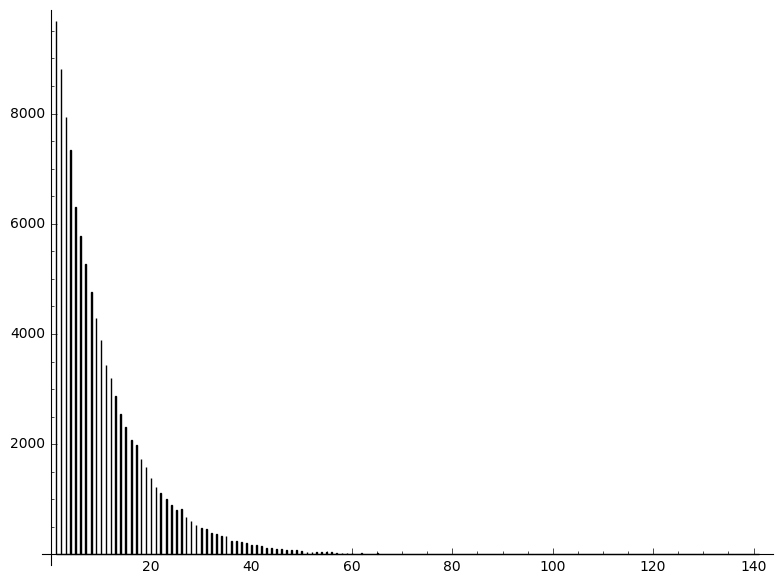

In [9]:
histogram(L,bins=1000)

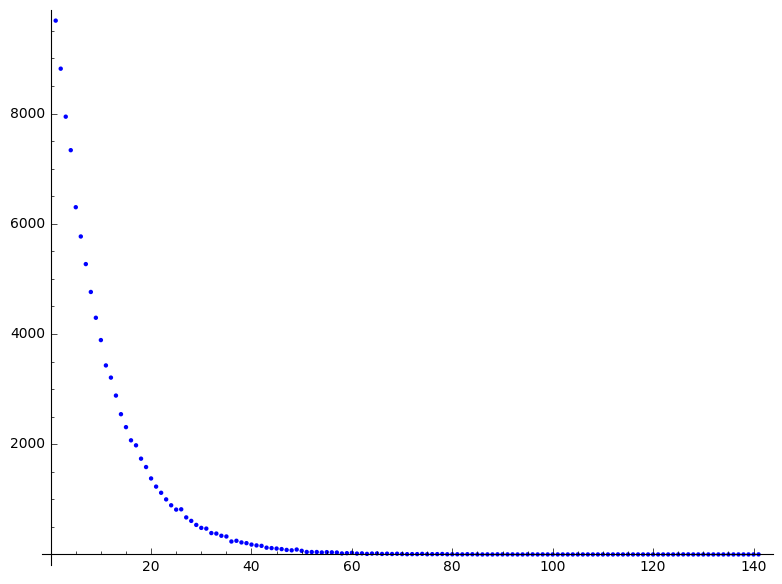

In [10]:
def frecuencias(L):
    m = min(L)
    M = max(L)
    L1 = []
    for k in xsrange(m,M+1):
        L1.append((k,L.count(k)))
    return L1
L1 =  frecuencias(L)
points(L1)


In [11]:
print L1

[(1, 9687), (2, 8815), (3, 7944), (4, 7336), (5, 6301), (6, 5770), (7, 5269), (8, 4763), (9, 4295), (10, 3890), (11, 3430), (12, 3209), (13, 2883), (14, 2545), (15, 2310), (16, 2071), (17, 1980), (18, 1738), (19, 1586), (20, 1379), (21, 1231), (22, 1119), (23, 999), (24, 892), (25, 814), (26, 819), (27, 672), (28, 609), (29, 536), (30, 482), (31, 469), (32, 388), (33, 379), (34, 339), (35, 326), (36, 235), (37, 248), (38, 218), (39, 205), (40, 179), (41, 164), (42, 156), (43, 123), (44, 115), (45, 107), (46, 97), (47, 82), (48, 75), (49, 89), (50, 66), (51, 45), (52, 44), (53, 44), (54, 36), (55, 42), (56, 38), (57, 35), (58, 18), (59, 23), (60, 30), (61, 16), (62, 19), (63, 10), (64, 16), (65, 18), (66, 9), (67, 14), (68, 8), (69, 13), (70, 7), (71, 5), (72, 6), (73, 6), (74, 10), (75, 4), (76, 5), (77, 6), (78, 8), (79, 3), (80, 3), (81, 3), (82, 1), (83, 4), (84, 3), (85, 1), (86, 0), (87, 1), (88, 0), (89, 2), (90, 1), (91, 1), (92, 1), (93, 0), (94, 0), (95, 1), (96, 1), (97, 0), 

Parece difícil producir un modelo de estos datos porque hay dos escalas muy diferentes. Podemos verlo   utilizando como variable en el eje vertical el logaritmo del número de jugadas, lo que equivale a usar un modelo exponencial, que se ajusta bien a una recta hasta unas $40$ jugadas, pero después hay demasiadas oscilaciones y el ajuste es mediocre. 

###  Ejercicio 2

Un cierto sistema consiste en cuatro componentes  conectadas según el diagrama 
<img src='figura.jpg' style = 'width:60%;height:60%' >
Las componentes tienen una fiabilidad, en un período de tiempo de, por ejemplo, un año,  dada en la tabla 
<img src='figura2.jpg' style = 'width:40%;height:40%'>
de forma que, por ejemplo, la componente $1$ tiene una probabilidad $0.1$ de fallar durante un año de operación. Además las cuatro componentes fallan de forma independiente.

Calcula, mediante simulación, 

1. La probabilidad de que el sistema funcione sin fallo durante un año.

2. La probabilidad de que, supuesto que el sistema ha fallado antes de un año, se arregle reemplazando la componente $1$ por una nueva.

#### Apartado 1


In [12]:
def comp(p):
    x = random()
    if x<=p:
        return 1
    else:
        return 0

In [13]:
L = [0.9,0.95,0.95,0.99]
def experimento(L):
    if (comp(L[0])*comp(L[1])+comp(L[2]))*comp(L[3]) == 2:
                       return True
    else:
                        return False

In [14]:
def prob(N):
    cont = 0
    for muda in xsrange(N):
        if experimento(L)==True:
            cont += 1
    return (cont/N).n()

%time prob(10**5)

CPU times: user 808 ms, sys: 157 ms, total: 965 ms
Wall time: 702 ms


0.802460000000000

In [15]:
## Probabilidad teórica porque el fallo de las componentes ocurre de forma  independiente 
0.9*0.95*0.95*0.99

0.804127500000000

La condición en el if de la segunda celda parece que usa la forma en la que están conectadas las componentes, pero es equivalente a que ninguna de las componentes falle y se puede sustituir por $comp(L[0])*comp(L[1])*comp(L[2])*comp(L[3]) == 1$:



In [16]:
L = [0.9,0.95,0.95,0.99]
def experimento2(L):
    if comp(L[0])*comp(L[1])*comp(L[2])*comp(L[3]) == 1:
                       return True
    else:
                        return False
            
def prob2(N):
    cont = 0
    for muda in xsrange(N):
        if experimento2(L)==True:
            cont += 1
    return (cont/N).n()

%time prob2(10**5)

CPU times: user 741 ms, sys: 125 ms, total: 866 ms
Wall time: 673 ms


0.805320000000000

Este es un caso en el cálculo que la probabilidad teórica es completamente trivial y debemos intentar estudiar la forma en la que la simulación produce resultados próximos al valor verdadero: 

In [17]:
%time prob(10**6)

CPU times: user 6.16 s, sys: 181 ms, total: 6.34 s
Wall time: 6.05 s


0.803709000000000

In [18]:
%time prob(10**7)

CPU times: user 59.4 s, sys: 136 ms, total: 59.5 s
Wall time: 59.3 s


0.804152800000000

Parece que el límite en la precisión de la probabilidad obtenida mediante simulación está en este caso en $3$ cifras decimales correctas y ya no mejora a partir de $10^5$ vueltas.   

#### Apartado 2

In [19]:
def prob2(N):
    cont1 = 0
    cont2 = 0
    for muda in xsrange(N):
        L1 = [comp(L[j]) for j in srange(4)]
        if L1[0]*L1[1]== 0 or L1[2]==0 or L1[3]==0:
                           cont2 += 1
        if L1[0]==0 and prod(L1[1:])==1:
                            cont1 += 1
    return (cont1/cont2).n()
        
%time prob2(10**6)          

CPU times: user 25.4 s, sys: 124 ms, total: 25.6 s
Wall time: 25.4 s


0.456574201152035

### Ejercicio 3

Elegimos aleatoriamente $2n$, con $n\ge 2$, reales en el intervalo $[0,1]$ y formamos $n$ subintervalos emparejándolos en la forma natural, el primero con el segundo, el tercero con el cuarto, etc. Además, tomaremos como extremo inferior del subintervalo el menor elemento de la pareja y como extremo superior el mayor, de forma que todos los subintervalos son de la forma $[a,b]$ con $a<b$.

1. Define una función, de nombre $prob(n,N)$, que devuelva la probabilidad de que el primer subintervalo interseque a cada uno de los $n-1$ restantes (como casi siempre $N$ es el número de vueltas del bucle que calcula la probabilidad). 

2. Eligiendo adecuadamente los valores $n$ y $N$, ajusta un modelo para estudiar la forma en la que la probabilidad depende de los valores de $n$.

In [20]:
# Los intervalos I y J se intersecan si (y sólo si) uno de los extremos de 
# $J$ pertenece a $I$ o bien si $J$ contiene a $I$.

def inter(I,J):
    '''El primer if y el elif no hacen falta'''
    if I[0]>=I[1]:
        I[0],I[1] = I[1],I[0]
    elif J[0]>=J[1]:
        J[0],J[1] = J[1],J[0]
    if (I[0]<=J[0]<=I[1]) or\
     (I[0]<=J[1]<=I[1])or\
    (I[0]>=J[0] and J[1]>=I[1]):
        return True
    else:
        return False



In [21]:
inter([1,5],[-7,3])

True

In [22]:
inter([-1,-5],[6,7])

False

In [23]:
inter([-1,-5],[-3,0])

True

In [24]:
inter([-5,-1],[-3,0])

True

In [25]:
inter([-5,3],[-3,0])

True

In [26]:
def intervalos(L):
    if len(L)%2 != 0:
        return "ERROR"
    elif len(L)==2:
        return [[min(L),max(L)]]
    else:
        L1 = intervalos(L[:-2])
        return L1+[[min(L[-2:]),max(L[-2:])]]

intervalos([random() for muda in srange(4)])

[[0.47818358032677266, 0.7775782982019648],
 [0.21961373102574533, 0.2953938434888198]]

In [27]:
def intern(n):
    '''Devuelve True si el primero interseca a los demás'''
    L = [random() for muda in srange(2*n)]
    L1 = intervalos(L)
    for item in L1[1:]:
        if inter(L1[0],item)==False:
                return False
    return True
 
intern(17)

False

In [28]:
def prob(n,N):
    cont = 0
    for muda in xsrange(N):
        if intern(n):
            cont += 1
    return (cont/N).n()

%time prob(7,10**5)

CPU times: user 5.1 s, sys: 12.1 ms, total: 5.11 s
Wall time: 5.1 s


0.222710000000000

#### Apartado 2

In [29]:
%time L = [(n,prob(n,10**5)) for n in srange(5,55,5)]

CPU times: user 2min 11s, sys: 38.5 ms, total: 2min 11s
Wall time: 2min 11s


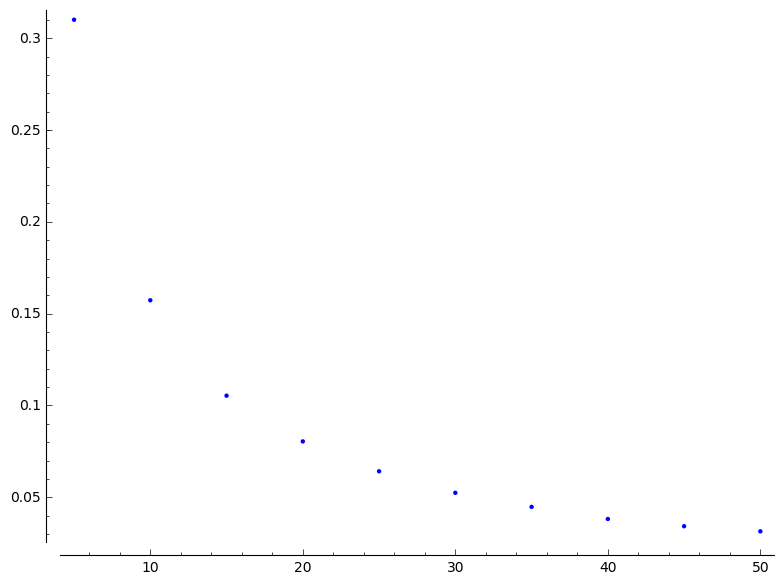

In [30]:
points(L)

In [31]:
var('A')
model(x)=A/x
dicc = find_fit(L,model,solution_dict=True)
print dicc

{A: 1.5604096351629988}


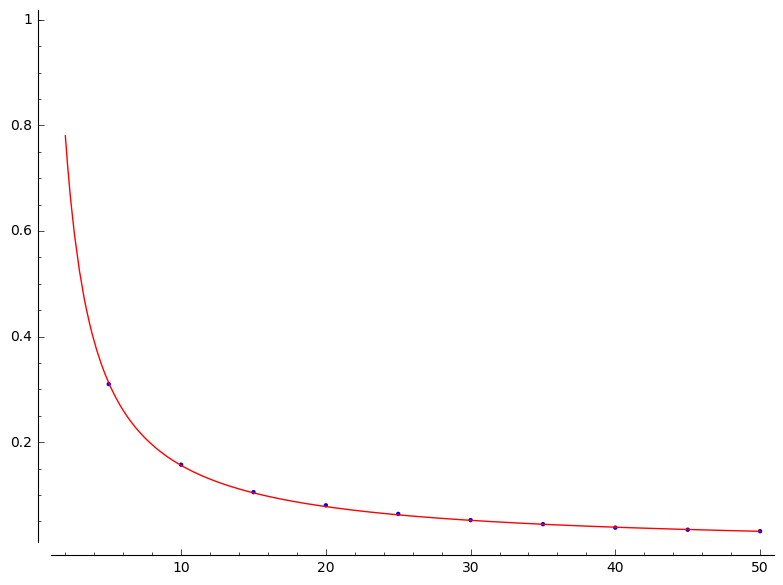

In [32]:
points(L)+plot(dicc[A]/x,x,2,50,ymax=1,color='red')